# Background
This is the largest retail e-commerce orders dataset from Pakistan. It contains half a million transaction records from March 2016 to August 2018. We want to use this data to better understand e-commerce customer behaviours to increase success rate for emerging-startup.

# Problem Statement

We want to get insight on which category are the most popular and what payment method is preferred by customer from different categories. This information will be used as suggestion for emerging start-up to increase success rate by combining popular categories with suitable payment method.

Below are the questions to be answered:
1. What are the top 5 most popular categories?
2. What is the most preferred payment method for each of those top 5 categories?

# Data Understanding & Cleaning

To answer questions in problem statement, we will analyse Pakistan's Large E-Commerce dataset.<br>
Dataset can be accessed [here](https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset).<br>

Before continuing into analysis, we need to understand the dataset. During this process, we will or may find anomalies in the dataset which require handling during data cleaning process. Every anomaly handling shall be described with the statistical or domain knowledge justification.

## Import Required Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from scipy.stats import chi2_contingency

import warnings
warnings.filterwarnings('ignore')

## Import Database and Show Glimpse of Database

The dataset contains detailed information of half a million e-commerce orders in Pakistan from March 2016 to August 2018. It contains item details, shipping method, payment method like credit card, Easy-Paisa, Jazz-Cash, cash-on-delivery, product categories like fashion, mobile, electronics, appliance etc., date of order, SKU, price, quantity, total and customer ID. There are total 26 columns in the dataset:<br>

- item_id: unique id for each item
- status: order status
- created_at: the date when the order was created
- sku: stock keeping unit
- price: item's price
- qty_ordered: total quantity ordered
- grand_total: grand total of the customer spending
- increment_id: order id specific to each customer and increased with each purchase
- category_name_1: category name for the item
- sales_commission_code: commission code for sales
- discount_amount: discount amount for the order
- payment_method: payment method chosen by user for the order
- working date: the date when the order worked on
- BI status: the order status in the business intelligence system
- MV
- Year: the year when the order was created
- Month: the month when the order was created
- Customer Since: the month and year of customer's first order
- M-Y: the month-year when the order was created
- FY: fiscal year of the order
- Customer ID: unique id for each customer
- Unnamed 21-25: these columns are all empty

In [2]:
# read the dataset
df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')

In [3]:
pd.set_option('display.max_columns',None)

Below is 5 rows from the top and bottom of the dataset.

In [4]:
display(df.head(),df.tail())

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Below is the overall information of the dataset including number of rows and columns.

In [5]:
# show dataset information
print(f'Total of rows and columns in the dataset are {df.shape}')
df.info()

Total of rows and columns in the dataset are (1048575, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              58452

Below is the statistical description of the dataset for numerical and categorical data.

In [6]:
display(df.describe(), df.describe(include='object'))

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


,status,created_at,sku,increment_id,category_name_1,sales_commission_code,payment_method,Working Date,BI Status,MV,Customer Since,M-Y,FY
count,584509,584524,584504,584524,584360,447349,584524,584524,584524,584524,584513,584524,584524
unique,16,789,84889,408785,16,7226,18,789,4,9720,26,26,3
top,complete,11/25/2016,MATSAM59DB75ADB2F80,100266667,Mobiles & Tablets,\N,cod,11/25/2016,Net,999,2016-11,11-2017,FY18
freq,233685,15169,3775,72,115710,339001,271960,15169,234178,9516,82714,83928,306883


Below is the total of unique data and sample of unique data for each column.

In [7]:
pd.set_option('display.max_colwidth', None)
listUniqueItem = []
for col in df.columns :
    listUniqueItem.append( [col, df[col].nunique(), df[col].unique()])

tableDesc = pd.DataFrame(columns=['Column Name', 'Total of Unique', 'Unique Sample'],
                     data=listUniqueItem)
tableDesc

,Column Name,Total of Unique,Unique Sample
0,item_id,584524,"[211131.0, 211133.0, 211134.0, 211135.0, 211136.0, 211137.0, 211138.0, 211139.0, 211140.0, 211141.0, 211142.0, 211143.0, 211144.0, 211145.0, 211146.0, 211147.0, 211149.0, 211150.0, 211151.0, 211152.0, 211153.0, 211154.0, 211155.0, 211156.0, 211157.0, 211158.0, 211160.0, 211162.0, 211163.0, 211164.0, 211166.0, 211168.0, 211169.0, 211170.0, 211171.0, 211172.0, 211173.0, 211174.0, 211175.0, 211176.0, 211177.0, 211179.0, 211180.0, 211182.0, 211184.0, 211185.0, 211186.0, 211187.0, 211188.0, 211189.0, 211190.0, 211191.0, 211192.0, 211193.0, 211194.0, 211196.0, 211197.0, 211198.0, 211199.0, 211200.0, 211202.0, 211201.0, 211203.0, 211204.0, 211205.0, 211206.0, 211207.0, 211208.0, 211209.0, 211211.0, 211212.0, 211213.0, 211214.0, 211215.0, 211217.0, 211218.0, 211219.0, 211220.0, 211221.0, 211222.0, 211223.0, 211225.0, 211224.0, 211226.0, 211227.0, 211228.0, 211229.0, 211230.0, 211231.0, 211232.0, 211233.0, 211234.0, 211235.0, 211236.0, 211237.0, 211238.0, 211239.0, 211240.0, 211241.0, 211242.0, ...]"
1,status,16,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, nan, processing, payment_review]"
2,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/2016, 7/11/2016, 7/12/2016, 7/13/2016, 7/14/2016, 7/15/2016, 7/16/2016, 7/17/2016, 7/18/2016, 7/19/2016, 7/20/2016, 7/21/2016, 7/22/2016, 7/23/2016, 7/24/2016, 7/25/2016, 7/26/2016, 7/27/2016, 7/28/2016, 7/29/2016, 7/30/2016, 7/31/2016, 8/1/2016, 8/2/2016, 8/3/2016, 8/4/2016, 8/5/2016, 8/6/2016, 8/7/2016, 8/8/2016, 8/9/2016, 8/10/2016, 8/11/2016, 8/12/2016, 8/13/2016, 8/14/2016, 8/15/2016, 8/16/2016, 8/17/2016, 8/18/2016, 8/19/2016, 8/20/2016, 8/21/2016, 8/22/2016, 8/23/2016, 8/24/2016, 8/25/2016, 8/26/2016, 8/27/2016, 8/28/2016, 8/29/2016, 8/30/2016, 8/31/2016, 9/1/2016, 9/2/2016, 9/3/2016, 9/4/2016, 9/5/2016, 9/6/2016, 9/7/2016, 9/8/2016, 9/9/2016, 9/10/2016, 9/11/2016, 9/12/2016, 9/13/2016, 9/14/2016, 9/15/2016, 9/16/2016, 9/17/2016, 9/18/2016, 9/19/2016, 9/20/2016, 9/21/2016, 9/22/2016, 9/23/2016, 9/24/2016, 9/25/2016, 9/26/2016, 9/27/2016, 9/28/2016, 9/29/2016, 9/30/2016, 10/1/2016, 10/2/2016, 10/3/2016, 10/4/2016, 10/5/2016, 10/6/2016, 10/7/2016, 10/8/2016, ...]"
3,sku,84889,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free, Ego_UP0017-999-MR0, kcc_krone deal, BK7010400AG, UK_Namkino All In One 200 Gms, UK_Namkino Mix Nimco 400 Gms, Apple iPhone 6S 64GB, GFC_Pedestal Myga Cross Base (Special Guard) 24"", BK1070200PL, BK1130200CF, kcc_Sultanat, kcc_glamour deal, Assetmen_MD-346-M, cr_DATES WITH CASHEW-400 GM, UK_Gift Box Mix Dry Fruit Sweets 500 Gms, itter_AB 1199, RL_B005, bed&rest_S7, L&L_LLHLE8224S, J&J_JJR-4, J&J_JJR-20, D Lend a Helping Hand, Mochika_M0001112-12, Mochika_M0001112-8, SKMT_Blood Test, SKMT_Medicine, sputnik_701/5-11, Ctees-Black Zip- Up Hoodie-XL, Samsung Galaxy J5, Veet_4, RS_Gulab jaman Tin, cr_PEANUT SALTY-200 GM, Oriflame_21557, JBS_TAT-128, Ajmery_BRR-590-M, HOS_GUCFW75, Lexon_LL116B-Blue, kcc_Fantasy Perfumed Talcum Powder-200gm, 2Zee_SC6, Q MOBILE Noir X20, rehaab_RJ160047, Farah_3-B, RS_Sohan Halwa Tin, UK_Soan Papdi Original 250 Gms, UK_Gift Box Soghaat 500 Gms, RS_Double Delight, Al Muhafiz Sohan Halwa Almond, UK_Gift Box Baklawa 500 Gms, sputnik_2146/6-8, kkc_Kingtox 450ml Classic Green All Insect Killer Spray, Al Muhafiz Sohan Halwa Walnut, RS_Honey Dry Fruit Halwa, itter_AB 1214, Eco Star_40U557, Orient_OR-6057 GX LGFD LV, HOS_JPGCW100, kkc_Jasmine King Air Freshener, asimjofaeanew_5A, ajmery_F9-981, hijabh_JILBAB-C (1)-52x, noritake_NTM163M, RS_Habshi Halwa Tin, sentiments_WRK1612, bata_comfit-8613714-43-9, UK_Namkino Mix Nimco 8 Pcs Gift Pack, Inoxy_Inoxy Hair Miracle Elixir, RS_Chum Chum Tin, Dany_AUK-650 , urban_ PT004-L, jackpot_JP-7999, UK_Gift Box Pistachio Delight 500 Gms, test_tcsconnect, sst_Lyquin-Regular fit-Large, F

## Data Cleaning 1: Remove Empty Data
In the first step, we will remove empty data from the dataset. To prevent any major change in the data which will affect further analysis, we will only delete rows or columns with 100% empty data.

In [8]:
# confirm columns which contain 100% missing values
df[['Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 21  0 non-null      float64
 1   Unnamed: 22  0 non-null      float64
 2   Unnamed: 23  0 non-null      float64
 3   Unnamed: 24  0 non-null      float64
 4   Unnamed: 25  0 non-null      float64
dtypes: float64(5)
memory usage: 40.0 MB


In [9]:
# delete columns with 100% missing values
df.drop(['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], axis=1, inplace=True)

In [10]:
# count rows with 100% missing values
print(f'Total of rows with 100% missing values = {df.isna().all(axis=1).sum()}')

Total of rows with 100% missing values = 464051


In [11]:
# delete rows with 100% missing values
df.dropna(axis=0, how='all',inplace=True)

In [12]:
# check for duplicate rows
print(f'Total of duplicate rows = {df.duplicated().sum()}')

Total of duplicate rows = 0


In [13]:
# result check
print(f'Total of rows and columns in the dataset after removing empty data {df.shape}')

Total of rows and columns in the dataset after removing empty data (584524, 21)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status

## Data Cleaning 2: Rename Columns and Check for Whitespaces
In the second step, to improve readability and consistency in further steps, we will rename the columns.<br>
We also check if there are leading/trailing whitespaces in the values for each column and remove it if found.

In [14]:
# rename columns to increase readability and consistency
df = df.rename(columns={
    'item_id': 'ItemID',
    'status': 'Status',
    'created_at': 'CreatedAt',
    'sku': 'SKU',
    'price': 'Price',
    'qty_ordered': 'QuantityOrdered',
    'grand_total': 'GrandTotal',
    'increment_id': 'IncrementID',
    'category_name_1': 'CategoryName',
    'sales_commission_code': 'SalesCommissionCode',
    'discount_amount': 'DiscountAmount',
    'payment_method': 'PaymentMethod',
    'Working Date': 'WorkingDate',
    'BI Status': 'BIStatus',
    'MV': 'MV',
    'Year': 'Year',
    'Month': 'Month',
    'Customer Since': 'CustomerSince',
    'M-Y': 'MY',
    'FY': 'FY',
    'Customer ID': 'CustomerID'
})

In [15]:
# rename MV column to remove whitespaces
df.rename(columns={' MV ': 'MV'},inplace=True)

In [16]:
# check for leading and trailing whitespaces for each column
for col in df.columns:
    if df[col].dtype == "object":
        leading_spaces = df[col].str.count(' $')
        trailing_spaces = df[col].str.count('^ ')
        total_whitespace = leading_spaces.sum() + trailing_spaces.sum()
        if total_whitespace>0:
            print(f"Total number of whitespaces in column '{col}': {total_whitespace}")

Total number of whitespaces in column 'SKU': 4253.0
Total number of whitespaces in column 'SalesCommissionCode': 205.0
Total number of whitespaces in column 'MV': 1169048


In [17]:
# remove whitespaces in SKU, SalesCommissionCode, MV columns
df[['SKU','SalesCommissionCode','MV']] = df[['SKU','SalesCommissionCode','MV']].applymap(lambda x: x.strip() if isinstance(x, str) else x)

## Data Cleaning 3: Handle Missing Values

In the third step, we will handle missing values. From the sample below, we can see there are two types of missing values: NaN and \N. For each column we will first replace NaN values then \N values.

In [19]:
df.sample(10)

,ItemID,Status,CreatedAt,SKU,Price,QuantityOrdered,GrandTotal,IncrementID,CategoryName,SalesCommissionCode,DiscountAmount,PaymentMethod,WorkingDate,BIStatus,MV,Year,Month,CustomerSince,MY,FY,CustomerID
83755,314768.0,complete,11/24/2016,sinbo_4419,2200.0,1.0,13634.0,100216916,Appliances,\N,0.0,cod,11/24/2016,Net,"2,200",2016.0,11.0,2016-11,11-2016,FY17,19647.0
282395,557811.0,canceled,8/11/2017,Valarie_MF 04-M,361.0,1.0,7705.0,100345921,Men's Fashion,\N,0.0,cod,8/11/2017,Gross,361,2017.0,8.0,2017-3,8-2017,FY18,37904.0
540452,855982.0,order_refunded,5/23/2018,MATSAM5AA3E58DF3506,104999.0,1.0,104999.0,100533709,Mobiles & Tablets,NaN,0.0,Payaxis,5/23/2018,Valid,"104,999",2018.0,5.0,2018-5,5-2018,FY18,109377.0
527257,842019.0,canceled,5/9/2018,MATSAM5AAB5AEE5DBA7,28770.0,1.0,26180.7,100523824,Mobiles & Tablets,C-PEW-31067,2589.3,easypay_voucher,5/9/2018,Gross,"28,770",2018.0,5.0,2017-11,5-2018,FY18,80146.0
516528,830325.0,refund,4/23/2018,WOFALK5A8D08D89C8CE,2625.0,1.0,7875.0,100515686,Women's Fashion,NaN,0.0,bankalfalah,4/23/2018,Valid,"2,625",2018.0,4.0,2017-4,4-2018,FY18,39900.0
501429,813147.0,canceled,3/28/2018,OTHPCB5ABB207A3FD50,500.0,5.0,2500.0,100504476,Others,NaN,0.0,Easypay,3/28/2018,Gross,"2,500",2018.0,3.0,2018-3,3-2018,FY18,98121.0
320841,600555.0,complete,10/19/2017,MEFWIN59C9073239082,1199.0,1.0,1199.0,100371200,Men's Fashion,\N,0.0,cod,10/19/2017,Net,"1,199",2017.0,10.0,2017-10,10-2017,FY18,64573.0
346268,631326.0,complete,11/17/2017,APPJAC5A0302E6D2448,1063.0,1.0,1063.0,100388757,Appliances,\N,0.0,cod,11/17/2017,Net,"1,063",2017.0,11.0,2017-11,11-2017,FY18,69295.0
127028,369952.0,complete,12/15/2016,herbion_Linkus Nova 8's Lozenges - Orange Sugar Free,45.0,2.0,90.0,100249484,Health & Sports,\N,0.0,cod,12/15/2016,Net,90,2016.0,12.0,2016-8,12-2016,FY17,3888.0
372321,663091.0,complete,11/22/2017,APPJAC59EF4D640AC4D,799.0,1.0,8320.5,100406549,Appliances,c-uet-44938,169.9,easypay_voucher,11/22/2017,Net,799,2017.0,11.0,2017-5,11-2017,FY18,46050.0


In [20]:
# check for missing values in each columns
def missing_info(column):
    num_missing = column.isnull().sum()
    if num_missing > 0:
        return f"{column.name}: {column.dtype}, {num_missing} missing values"

# apply the custom function to each column
missing_columns_info = df.apply(missing_info).dropna()

# print only the columns with missing values
print(missing_columns_info)

Status                                  Status: object, 15 missing values
SKU                                        SKU: object, 20 missing values
CategoryName                     CategoryName: object, 164 missing values
SalesCommissionCode    SalesCommissionCode: object, 137175 missing values
CustomerSince                    CustomerSince: object, 11 missing values
CustomerID                         CustomerID: float64, 11 missing values
dtype: object


In [21]:
# check for \N values in each columns
# Find columns containing '\N'
columns_with_N = [col for col in df.columns if df[col].isin(['\\N']).any()]

# Display the column name, data type, and number of '\N' values
def display_total_Nvalues():
    for col in columns_with_N:
        num_N_values = df[col].isin(['\\N']).sum()
        print(f"Column: {col}")
        print(f"Number of '\\N' values: {num_N_values}")
        print("-" * 30)
display_total_Nvalues()

Column: Status
Number of '\N' values: 4
------------------------------
Column: CategoryName
Number of '\N' values: 7850
------------------------------
Column: SalesCommissionCode
Number of '\N' values: 339001
------------------------------


Only column Status, CategoryName, CustomerSince, and CustomerID are modified.<br>
Column SKU, SalesCommisionCode are left as it is because not used for the analysis (but NaN values are replaced with \N).

### Column `SKU` & `SalesCommissionCode`
We replace all NaN values in SKU & SalesCommissionCode columns with \N.

In [22]:
df['SKU'].fillna('\\N',inplace=True)
df['SalesCommissionCode'].fillna('\\N',inplace=True)

### Column `Status`

In [23]:
# check missing values in column Status
dfStatusTemp1 = df[df['Status'].isnull()].sort_values('CustomerID')
dfStatusTemp1

,ItemID,Status,CreatedAt,SKU,Price,QuantityOrdered,GrandTotal,IncrementID,CategoryName,SalesCommissionCode,DiscountAmount,PaymentMethod,WorkingDate,BIStatus,MV,Year,Month,CustomerSince,MY,FY,CustomerID
477519,783751.0,NaN,3/15/2018,OTHPCB5A7D8A0BD10E8,8000.0,1.0,8000.0,100479380,Others,\N,0.0,cod,3/15/2018,Gross,"8,000",2018.0,3.0,2018-3,3-2018,FY18,95141.0
513736,827187.0,NaN,4/16/2018,KABOXF5ABCC75C7E2F7-32,370.0,1.0,2707.0,100513933,Kids & Baby,\N,0.0,cod,4/16/2018,Gross,370,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513737,827189.0,NaN,4/16/2018,KABSHO5AA77C331466F-11-13 Years,473.0,1.0,2707.0,100513933,Kids & Baby,\N,0.0,cod,4/16/2018,Gross,473,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513738,827191.0,NaN,4/16/2018,KABBIN5A93E074C501A-8-9 Years,749.0,1.0,2707.0,100513933,Kids & Baby,\N,0.0,cod,4/16/2018,Gross,749,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513739,827193.0,NaN,4/16/2018,KABLIT59AC117FD51C4-12-13 Years,692.0,1.0,2707.0,100513933,Kids & Baby,\N,0.0,cod,4/16/2018,Gross,692,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513740,827195.0,NaN,4/16/2018,KABCOL5AB2B8019805C-8-9 Years,423.0,1.0,2707.0,100513933,Kids & Baby,\N,0.0,cod,4/16/2018,Gross,423,2018.0,4.0,2018-4,4-2018,FY18,105059.0
532965,848003.0,NaN,5/14/2018,MATINF5AE310D2D7A1A,13950.0,1.0,13950.0,100527966,Mobiles & Tablets,\N,0.0,cod,5/14/2018,Gross,"13,950",2018.0,5.0,2018-4,5-2018,FY18,105319.0
518706,832777.0,NaN,4/30/2018,ENTCLI5A5DD7D800D6E,6042.0,1.0,6042.0,100517141,Entertainment,\N,0.0,cod,4/30/2018,Gross,"6,042",2018.0,4.0,2018-4,4-2018,FY18,106036.0
554962,872154.0,NaN,6/15/2018,BAGPHI5AA665985A58E,2900.0,1.0,949.0,100542483,Beauty & Grooming,\N,200.0,bankalfalah,6/15/2018,Gross,"2,900",2018.0,6.0,2018-5,6-2018,FY18,109420.0
542146,857829.0,NaN,5/25/2018,ROO5AE983F2751EA,2280.0,1.0,2280.0,100534786,Superstore,\N,0.0,cod,5/25/2018,Gross,"2,280",2018.0,5.0,2018-5,5-2018,FY18,109580.0


In [24]:
# display CustomerID where the Status column value is NaN
listMissingValue1 = [['CustomerID', dfStatusTemp1['CustomerID'].nunique(), dfStatusTemp1['CustomerID'].unique()]]
tableMissingValue1 = pd.DataFrame(columns=['Column Name', 'Total of Unique', 'Unique Data'],data=listMissingValue1)
tableMissingValue1

,Column Name,Total of Unique,Unique Data
0,CustomerID,9,"[95141.0, 105059.0, 105319.0, 106036.0, 109420.0, 109580.0, 111346.0, 111651.0, 112111.0]"


From the table above, there are 9 CustomerID that have NaN value in the Status column. We will use this CustomerID to check if there are other orders with the same CustomerID and check for correlation. This correlation will be use to assume what the NaN value should be filled with. Only two example is shown, CustomerID 109420.0 and 105059.0

In [25]:
display(df[df['CustomerID']==109420.0],df[df['CustomerID']==109580.0])

,ItemID,Status,CreatedAt,SKU,Price,QuantityOrdered,GrandTotal,IncrementID,CategoryName,SalesCommissionCode,DiscountAmount,PaymentMethod,WorkingDate,BIStatus,MV,Year,Month,CustomerSince,MY,FY,CustomerID
540633,856182.0,received,5/23/2018,MATKHU5A8180BB7BA18,1599.0,1.0,1599.00,100533856,Mobiles & Tablets,\N,0.00,cod,5/23/2018,Valid,"1,599",2018.0,5.0,2018-5,5-2018,FY18,109420.0
546162,862359.0,received,5/30/2018,MATUNB5A9EC9643AD44,1675.0,1.0,1675.00,100536872,Mobiles & Tablets,\N,0.00,cod,5/30/2018,Valid,"1,675",2018.0,5.0,2018-5,5-2018,FY18,109420.0
548266,864657.0,order_refunded,6/1/2018,MATHAR5A583C483D83C,2061.0,1.0,1751.85,100538105,Mobiles & Tablets,\N,309.15,Easypay,6/1/2018,Valid,"2,061",2018.0,6.0,2018-5,6-2018,FY18,109420.0
549886,866451.0,canceled,6/5/2018,MATDEA5AFD244F8B501,2499.0,1.0,4098.00,100539163,Mobiles & Tablets,\N,0.00,cod,6/5/2018,Gross,"2,499",2018.0,6.0,2018-5,6-2018,FY18,109420.0
549887,866452.0,canceled,6/5/2018,MATSUP5A818CA19C6DC,1599.0,1.0,4098.00,100539163,Mobiles & Tablets,\N,0.00,cod,6/5/2018,Gross,"1,599",2018.0,6.0,2018-5,6-2018,FY18,109420.0
550433,867068.0,canceled,6/6/2018,MATKHU5A8180BD08795,1599.0,1.0,3351.00,100539488,Mobiles & Tablets,\N,0.00,bankalfalah,6/6/2018,Gross,"1,599",2018.0,6.0,2018-5,6-2018,FY18,109420.0
550434,867069.0,canceled,6/6/2018,MATHAR5A583C411B7B0,1752.0,1.0,3351.00,100539488,Mobiles & Tablets,\N,0.00,bankalfalah,6/6/2018,Gross,"1,752",2018.0,6.0,2018-5,6-2018,FY18,109420.0
550440,867075.0,received,6/6/2018,MATKHU5A8180BD08795,1599.0,1.0,3351.00,100539491,Mobiles & Tablets,\N,0.00,cod,6/6/2018,Valid,"1,599",2018.0,6.0,2018-5,6-2018,FY18,109420.0
550441,867076.0,received,6/6/2018,MATHAR5A583C411B7B0,1752.0,1.0,3351.00,100539491,Mobiles & Tablets,\N,0.00,cod,6/6/2018,Valid,"1,752",2018.0,6.0,2018-5,6-2018,FY18,109420.0
554962,872154.0,NaN,6/15/2018,BAGPHI5AA665985A58E,2900.0,1.0,949.00,100542483,Beauty & Grooming,\N,200.00,bankalfalah,6/15/2018,Gross,"2,900",2018.0,6.0,2018-5,6-2018,FY18,109420.0


,ItemID,Status,CreatedAt,SKU,Price,QuantityOrdered,GrandTotal,IncrementID,CategoryName,SalesCommissionCode,DiscountAmount,PaymentMethod,WorkingDate,BIStatus,MV,Year,Month,CustomerSince,MY,FY,CustomerID
542118,857793.0,canceled,5/25/2018,ROO5AE983F2751EA,2280.0,1.0,1710.0,100534768,Superstore,\N,570.0,Easypay,5/25/2018,Gross,"2,280",2018.0,5.0,2018-5,5-2018,FY18,109580.0
542120,857797.0,canceled,5/25/2018,ROO5AE983F2751EA,2280.0,1.0,2052.0,100534770,Superstore,\N,228.0,Easypay,5/25/2018,Gross,"2,280",2018.0,5.0,2018-5,5-2018,FY18,109580.0
542141,857824.0,canceled,5/25/2018,ROO5AE983F2751EA,2280.0,2.0,3420.0,100534782,Superstore,\N,1140.0,Easypay,5/25/2018,Gross,"4,560",2018.0,5.0,2018-5,5-2018,FY18,109580.0
542146,857829.0,NaN,5/25/2018,ROO5AE983F2751EA,2280.0,1.0,2280.0,100534786,Superstore,\N,0.0,cod,5/25/2018,Gross,"2,280",2018.0,5.0,2018-5,5-2018,FY18,109580.0
542154,857838.0,received,5/25/2018,ROO5AE983F2751EA,2280.0,2.0,3420.0,100534792,Superstore,\N,1140.0,Easypay,5/25/2018,Valid,"4,560",2018.0,5.0,2018-5,5-2018,FY18,109580.0
542163,857847.0,canceled,5/25/2018,ROO5AE983F2751EA,2280.0,2.0,4560.0,100534796,Superstore,\N,0.0,Easypay,5/25/2018,Gross,"4,560",2018.0,5.0,2018-5,5-2018,FY18,109580.0


From both CustomerID 109420 and 109580 tables above, we can see that customer often cancel the order multiple times before finally proceed with the order. Then it can be assumed NaN status is canceled.

In [26]:
# replace NaN value with canceled
indices_Status_NaN = dfStatusTemp1.index.to_list()

def replace_N_values(list_name,column_name,replace_with):
    for i in list_name:
        df.at[i,column_name] = replace_with

replace_N_values(indices_Status_NaN,'Status','canceled')

In [27]:
# check \N values in column Status
dfStatusTemp2 = df[df['Status']=='\\N']
dfStatusTemp2

,ItemID,Status,CreatedAt,SKU,Price,QuantityOrdered,GrandTotal,IncrementID,CategoryName,SalesCommissionCode,DiscountAmount,PaymentMethod,WorkingDate,BIStatus,MV,Year,Month,CustomerSince,MY,FY,CustomerID
255520,526623.0,\N,7/3/2017,test-product-3,3.0,2.0,231.0,100332005,\N,\N,0.0,cod,7/3/2017,Gross,6,2017.0,7.0,2016-7,7-2017,FY18,1423.0
255521,526624.0,\N,7/3/2017,test-product,75.0,1.0,231.0,100332005,\N,\N,0.0,cod,7/3/2017,Gross,75,2017.0,7.0,2016-7,7-2017,FY18,1423.0
255624,526754.0,\N,7/3/2017,test-product-3,3.0,2.0,231.0,100332075,\N,\N,0.0,cod,7/3/2017,Gross,6,2017.0,7.0,2016-7,7-2017,FY18,1423.0
255625,526755.0,\N,7/3/2017,test-product,75.0,1.0,231.0,100332075,\N,\N,0.0,cod,7/3/2017,Gross,75,2017.0,7.0,2016-7,7-2017,FY18,1423.0


From the table above, \N value in Status column is for one CustomerID only: 1423.0 with test-product as the value in SKU column. With that information, we assume the same customer only check the test product then cancel the order. It is then assumed \N in status column can be replaced with cancelled.

In [28]:
# replace \N value with canceled
indices_Status_N = dfStatusTemp2.index.to_list()

replace_N_values(indices_Status_N,'Status','canceled')

### Column `CategoryName`

To make the replacing more efficient, we will replace missing values with \N first, then analyse it as whole.

In [29]:
# check missing values in column CategoryName
dfCategoryTemp1 = df[df['CategoryName'].isnull()].sort_values('CustomerID')
dfCategoryTemp1

,ItemID,Status,CreatedAt,SKU,Price,QuantityOrdered,GrandTotal,IncrementID,CategoryName,SalesCommissionCode,DiscountAmount,PaymentMethod,WorkingDate,BIStatus,MV,Year,Month,CustomerSince,MY,FY,CustomerID
519389,833551.0,refund,5/2/2018,OTHOTH5A2F72DBBB0C9,100.0,1.0,250.0,100517559,NaN,\N,0.0,cod,5/2/2018,Valid,100,2018.0,5.0,2016-7,5-2018,FY18,1423.0
454778,757605.0,canceled,2/21/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100461765,NaN,\N,0.0,bankalfalah,2/21/2018,Gross,99,2018.0,2.0,2016-7,2-2018,FY18,1423.0
519472,833638.0,refund,5/2/2018,OTHOTH5A2F72DBBB0C9,100.0,1.0,250.0,100517602,NaN,\N,0.0,cod,5/2/2018,Valid,100,2018.0,5.0,2016-7,5-2018,FY18,1423.0
454845,757685.0,order_refunded,2/21/2018,MEFQMO59B0942707B79-M,99.0,1.0,249.0,100461801,NaN,\N,0.0,cod,2/21/2018,Valid,99,2018.0,2.0,2016-7,2-2018,FY18,1423.0
541927,857600.0,received,5/25/2018,WOFASA5AE962A6DD038,199.0,1.0,1344.0,100534649,NaN,\N,0.0,cod,5/25/2018,Valid,199,2018.0,5.0,2016-7,5-2018,FY18,2237.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519844,834039.0,cod,5/3/2018,OTHOTH5A2F72DBBB0C9,100.0,1.0,250.0,100517838,NaN,\N,0.0,cod,5/3/2018,Valid,100,2018.0,5.0,2018-5,5-2018,FY18,106217.0
519874,834072.0,received,5/3/2018,COMWD5AA8FF5851E73,314.0,1.0,12730.0,100517852,NaN,\N,0.0,bankalfalah,5/3/2018,Valid,314,2018.0,5.0,2018-5,5-2018,FY18,106285.0
532988,848026.0,canceled,5/14/2018,COMWD5AA8FF5851E73,314.0,1.0,464.0,100527985,NaN,\N,0.0,Easypay,5/14/2018,Gross,314,2018.0,5.0,2018-5,5-2018,FY18,108252.0
535572,850761.0,received,5/16/2018,KABASA5ABC763F62E76,506.0,1.0,656.0,100530038,NaN,\N,0.0,cod,5/16/2018,Valid,506,2018.0,5.0,2018-5,5-2018,FY18,108622.0


In [30]:
# display SKU where the CategoryName column value is NaN
listMissingValue2 = [['SKU', dfCategoryTemp1['SKU'].nunique(), dfCategoryTemp1['SKU'].unique()]]
tableMissingValue2 = pd.DataFrame(columns=['Column Name', 'Total of Unique', 'Unique Data'],data=listMissingValue2)
tableMissingValue2

,Column Name,Total of Unique,Unique Data
0,SKU,16,"[OTHOTH5A2F72DBBB0C9, MEFQMO59B0942707B79-M, WOFASA5AE962A6DD038, WOFASA5AE962ADCB1FD, MEFQMO59B0942707B79-S, MEFQMO59B0942707B79-L, COMWD5AA8FF5851E73, MEFQMO5A963699761E6, MEFQMO5A963699BA878, OTHQMO5A964AFFE94D7-M, OTHQMO5A964B012EE33, OTHQMO5A964B0172970, OTHQMO5A964AFFE94D7-L, MATHAP5A698AF771FCD, BAGEMA5AA697AA2016F, KABASA5ABC763F62E76]"


In [31]:
# replace NaN values with \N for more efficient replacing process
indices_Category_NaN = dfCategoryTemp1.index.to_list()
replace_N_values(indices_Category_NaN,'CategoryName','\\N')

By seeing the missing values from `CategoryName` above, it is possible to pinpoint what is the `CategoryName` should be by seeing the `SKU` and relate it with similar `SKU` that has non null `CategoryName`. So we will use the `SKU` to decide what value the `CategoryName` should be.

In [32]:
# create copy of SKU column and convert it to lower case for cleaning purpose only
df['SKUcopy'] = df['SKU'].copy().str.lower()

In [33]:
# create new temporary dataframe by filtering only \N value from CategoryName column
dfCategoryTemp2 = df[df['CategoryName']=='\\N']
dfCategoryTemp2['CategoryName'].value_counts()

\N    8014
Name: CategoryName, dtype: int64

In [34]:
# display SKU where the CategoryName column value is \N
listMissingValue3 = [['SKUcopy', dfCategoryTemp2['SKUcopy'].nunique(), dfCategoryTemp2['SKUcopy'].unique()]]
tableMissingValue3 = pd.DataFrame(columns=['Column Name', 'Total of Unique', 'Unique Data'],data=listMissingValue3)
tableMissingValue3

,Column Name,Total of Unique,Unique Data
0,SKUcopy,307,"[d lend a helping hand, sentiments_wrk1612, urban_ pt004-l, test_tcsconnect, sentiments_ferrero rocher gift box, test_tcsconnect1, test hazir product 2-karachi, we_ni72_parrot-veet-gift, cos_prfume_9, teenz_e-1574 silver, e tcf_educate a child for a month-pkr 1250, gbh_gs802-7, dawlance_md 10 + dwb 600, gasonline-mpt-524-beige-36, gasonline-mpt-560-grey-30, bo_4 ft sunset glow baby swimming pool, jbs_wen-043, alkhair_black seed oil softgel capsules100 cap bottle, kansai_frosted glass, shoppers stop_magicglass-3, xenium_wa-201637, pny_ou3 -32gb, scent_calvin klein fresh 75ml, gasonline-mpt-205-mustard-32, vitamin_265, uk_ramdan gift box 2, hol_d1, test hazir product-karachi, test-product-00, lacie_9000146, the vitamin company kojic acid whitening cream 40gm, duma_4561254076083, us-msac-08, asimjofaeanew_1b, cos_prfume_51, hol_d2, rs_rehmat-e-shereen mix mithai, test hazir product 2-islamabad, oriflame_31131, hol_w-590, we_co4-veet-gift-1, kansai_cardinal red, cosmo_black out - paddle brush, stripyinterior_100006, jbs_hcd-hon-012, sstop_universallensclipkit, hp_hp 1510 - white_16_clear, uc_deeppink-l, trans2_lw 999, uc_deeppink-xl, edifier_xm2_clear, uc_deeppink-m, wb_t-27-m, uc_orange-l, uc_orange-xl, urban_ pt004-m, booster cable 500amp, life source_life source air mattress, hol_d3, xenium_cc-201660, sanasafinaz_march16_11a-veet-gift, infinix_hot 3 gold_veet gift, sanasafinaz_march16_2b-veet gift, sanasafinaz_march16_5a-veet gift, sanasafinaz_march16_5b-veet-gift, sanasafinaz_march16_6a-veet gift, sanasafinaz_march16_9a-veet gift, emart_00-1, kansai_bbq & stove, kansai_v2100 system high heat spray, sp_mango_special, reborn001-l, ashbroe_ablw-152(c), apple mac book pro 13-inch retina display 2.9 ghz, lamp_lamp shade umbrella 1, telemall_mm-dr-hb-l, kansai_chalkboard brush-on, uc_orange-m, bo_royal castle baby pool, bo_intex-sharkspray-grey, lc_8002135125209, wb_t-75-m, aw_pks-0013-white-s, wb_t-27-xl, triumph_fashion 93 wp-32-36, \n, triumph_britney-32-40, dawlance_bundle_dwek-8229_clear, wb_t-30-m, triumph_bh 007 m-skin, ocean blue36, triumph_beginner 66 crop top-skin, blackm, bo_5 ft sunset glow baby swimming pool, bo_2 ft sunset glow baby swimming pool, infinix hot 4 hazir-black-islamabad, infinix hot 4 hazir-gold-karachi, infinix hot 4 hazir-gold-lahore, infinix hot 4 nationwide-gold, infinix hot 4 nationwide-black, transcend_64gb jetflash 810, wb_t-30-s, ...]"


From the table above, we will search similar SKU in the original dataset and narrow it into possible CategoryName. Due to my current skill limitation, I use both excel and dataframe to check each SKU and pinpoint the possible CategoryName.<br><br>
I use excel combined with string search (startswith and contains) to pinpoint possible CategoryName. The excel file can be found [here](https://docs.google.com/spreadsheets/d/18dD3KxYJ2uSB7Oe-EjWhgouoSkzEHXzV/edit?usp=share_link&ouid=101189589412275075928&rtpof=true&sd=true)<br>
Below I give one example for startswith and contains search process.

#### Search with startswith
Example keyword from list of `SKU` is "charizma".

In [35]:
df[df['SKUcopy'].str.startswith('charizma')]['CategoryName'].unique()

array(["Women's Fashion", '\\N'], dtype=object)

The result shows only two unique values from the `CategoryName` column, Women's Fashion and \\N. It is then safe to assume the other `SKU` with "charizma" keyword can be set to Women's Fashion for its `CategoryName`.

#### Search with contains
Example keyword from list of `SKU` is "huawei_".

In [36]:
df[df['SKUcopy'].str.contains('huawei_')]['CategoryName'].unique()

array(['Mobiles & Tablets', '\\N', 'Entertainment'], dtype=object)

The results shows three uniques values from the `CategoryName` column, Mobiles & Tablets, Entertainment, and \\N. For better accuracy, we will try to narrow it further by extending the keyword in below example.

In [37]:
display(
    df[df['SKUcopy'].str.contains('huawei_p')]['CategoryName'].unique(),
    df[df['SKUcopy'].str.contains('huawei_y')]['CategoryName'].unique()
)

array(['Mobiles & Tablets', '\\N'], dtype=object)

array(['Mobiles & Tablets', '\\N'], dtype=object)

By extending the keyword (adding p or y, based on the available `SKU` with \N value) we can narrow it to only two unique values, Mobiles & Tablets and \\N. Then we can safely assume the other `SKU` with "huawei_" keyword can be set to Mobiles & Tablets for its `CategoryName`.

#### Replace with contains
After performing both search above, below are the list of keywords correspond to their possible `CategoryName`. Then we replace the \N values in `CategoryName` using for loop. This section is to replace using contains, we perform contains first because the keyword will match more results than startswith.

In [38]:
# keywords for each category (contains method only)
list_sku_kids1 = ["baby","edu"]
list_sku_health1 = ["pain","black seed"]
list_sku_mobile1 = ["huawei_"]
list_sku_others1 = ["test"]

# combined keywords for all category (contains method only)
list_sku_cont = [list_sku_kids1,list_sku_mobile1,list_sku_health1,list_sku_others1]
list_cat_cont = ["Kids & Baby","Mobiles & Tablets","Health & Sports","Others"]

In [39]:
# replacing CategoryName by using SKU keywords
for i, j in enumerate(list_sku_cont):
    for x in range(len(j)):
        indices_Cat_N = dfCategoryTemp2[dfCategoryTemp2['SKUcopy'].str.contains(j[x])].index.to_list()
        replace_N_values(indices_Cat_N,'CategoryName',list_cat_cont[i])

#### Replace with startswith
Similarly, below are the list of keywords correspond to their possible `CategoryName`. Then we replace the \N values in `CategoryName` using for loop. This section is to replace using startswith, we perform startswith after contains because the keyword will match less results than contains.

In [40]:
# keywords for each category (startswith method only)
list_sku_beauty = ["bagema","cos","lc_8","oriflame","shaver","acne","sapil","scent_","the vitamin","xenium_"]
list_sku_kids = ["asfas","bo_","kabasa","stinnos_","trans","us-m"]
list_sku_computing = ["apple","audionic_6","audionic_ah","audionic_sh","audionic6-","booster","comwd","edifier_x","hp_",
                      "kingston","lacie","pny_","reborn","seagate","transcend","tucano","wd_wd"]
list_sku_home = ["bo_high","bo_lemon","bo_non","bo_pack","bo_pestle","bo_silic","coleman","duma","interwood",
                 "jbs","kansai","lamp_","rajesh_b","stripy","supersmile","turbo","yc_"]
list_sku_womens = ["alerashine","ashbroe","asimjo","charizma","clickbuscollection","contessa","gbh_gs","naushemian",
                   "regal_","sanasafinaz","teenz_e","triumph","wb_th-","we_","wofasa5","xenium_w","zne_"]
list_sku_mobile = ["audionic_6-954217-5","audionic_69542175988","cl29","dany_69542178","infinix","mathap","mt_red",
                   "nvc_","q mobile","qmobile","shoppers","sstop_"]
list_sku_superstore = ["kansai_v","lalqila","ls_8","rb_dettol","sehgal"]
list_sku_appliances = ["dawlance","haier","mm_ag","ssst_sm","west point"]
list_sku_books = ["lm_"]
list_sku_entertainment = ["dany6"]
list_sku_health = ["life source","rajesh_raj038","telemall_","vitamin_2"]
list_sku_mens = ["ac_ac","am-ptv","aw_pks","carson","corio","gasonline","hol_","iu_","jsm","mefqmo5","qzs_",
                 "r-tree","route_km","tcreation","tm_tm","uc_","urban_","wb_t-","zedage_"]
list_sku_others = ["\\n","asdfas","bfw","d lend","emart","oth","sentiments","voucher","wplanit"]
list_sku_school = ["stbb_","stpat_"]
list_sku_soghaat = ["rs_rehmat","sp_mango","uk_ramdan"]

# combined keywords for all category (startswith method only)
list_sku_start = [list_sku_beauty,list_sku_kids,list_sku_computing,list_sku_home,list_sku_womens,list_sku_mobile,
                  list_sku_superstore,list_sku_appliances,list_sku_books,list_sku_entertainment,list_sku_health,
                  list_sku_mens,list_sku_others,list_sku_school,list_sku_soghaat]
list_cat_start = ['Beauty & Grooming','Kids & Baby','Computing','Home & Living',"Women's Fashion",
                  'Mobiles & Tablets','Superstore','Appliances','Books','Entertainment','Health & Sports',
                  "Men's Fashion",'Others','School & Education','Soghaat']

In [41]:
# replacing CategoryName by using SKU keywords
for i, j in enumerate(list_sku_start):
    for x in range(len(j)):
        indices_Cat_N = dfCategoryTemp2[dfCategoryTemp2['SKUcopy'].str.contains(j[x])].index.to_list()
        replace_N_values(indices_Cat_N,'CategoryName',list_cat_start[i])

#### Confirm the result

In [42]:
# Display the column name, data type, and number of '\N' values
display_total_Nvalues()

Column: Status
Number of '\N' values: 0
------------------------------
Column: CategoryName
Number of '\N' values: 17
------------------------------
Column: SalesCommissionCode
Number of '\N' values: 476176
------------------------------


In [43]:
# check the remaining 17 \N values in CategoryName column
df[df['CategoryName']=='\\N']

,ItemID,Status,CreatedAt,SKU,Price,QuantityOrdered,GrandTotal,IncrementID,CategoryName,SalesCommissionCode,DiscountAmount,PaymentMethod,WorkingDate,BIStatus,MV,Year,Month,CustomerSince,MY,FY,CustomerID,SKUcopy
14846,230008.0,canceled,8/13/2016,\N,0.0,1.0,0.0,100160070,\N,\N,0.0,cod,8/13/2016,Gross,-,2016.0,8.0,2016-8,8-2016,FY17,3468.0,\n
20676,236830.0,canceled,9/1/2016,\N,0.0,1.0,0.0,100164902,\N,\N,0.0,cod,9/1/2016,Gross,-,2016.0,9.0,2016-8,9-2016,FY17,4369.0,\n
39838,260006.0,canceled,10/7/2016,\N,0.0,1.0,0.0,100181136,\N,\N,0.0,cod,10/7/2016,Gross,-,2016.0,10.0,2016-7,10-2016,FY17,939.0,\n
39839,260007.0,canceled,10/7/2016,\N,0.0,3.0,0.0,100181137,\N,\N,0.0,cod,10/7/2016,Gross,-,2016.0,10.0,2016-7,10-2016,FY17,939.0,\n
39880,260061.0,canceled,10/7/2016,\N,0.0,3.0,0.0,100181174,\N,\N,0.0,cod,10/7/2016,Gross,-,2016.0,10.0,2016-7,10-2016,FY17,939.0,\n
124968,367292.0,refund,12/10/2016,\N,0.0,1.0,0.0,100247863,\N,\N,0.0,cod,12/10/2016,Valid,-,2016.0,12.0,2016-11,12-2016,FY17,26305.0,\n
125636,368122.0,refund,12/12/2016,\N,0.0,1.0,0.0,100248364,\N,\N,0.0,cod,12/12/2016,Valid,-,2016.0,12.0,2016-7,12-2016,FY17,2246.0,\n
125811,368362.0,refund,12/13/2016,\N,0.0,1.0,0.0,100248497,\N,\N,0.0,cod,12/13/2016,Valid,-,2016.0,12.0,2016-7,12-2016,FY17,251.0,\n
149597,399798.0,refund,2/7/2017,\N,0.0,1.0,0.0,100267148,\N,\N,0.0,cod,2/7/2017,Valid,-,2017.0,2.0,2017-2,2-2017,FY17,33062.0,\n
170249,426105.0,canceled,3/21/2017,\N,0.0,1.0,6952.0,100281645,\N,\N,0.0,cod,3/21/2017,Gross,-,2017.0,3.0,2017-3,3-2017,FY17,38242.0,\n


From the result check above, we find that there are 17 \N values remain in `CategoryName` columns. All those 17 values also have \N value in the `SKU` column. Because both columns value are \N, we cannot safely assume what is the `CategoryName`. So we will delete those 17 rows.

In [44]:
# delete 17 rows with \N value in CategoryName column
df.drop(df[df['CategoryName']=='\\N'].index,inplace=True)

In [45]:
# delete temporary column SKU copy
df.drop('SKUcopy',axis=1,inplace=True)

### Column CustomerSince & CustomerID

In [46]:
# check missing values in column CustomerSince
print('Total of missing values = ',df[df['CustomerSince'].isnull()].shape[0])
display(df[df['CustomerSince'].isnull()])

Total of missing values =  11


,ItemID,Status,CreatedAt,SKU,Price,QuantityOrdered,GrandTotal,IncrementID,CategoryName,SalesCommissionCode,DiscountAmount,PaymentMethod,WorkingDate,BIStatus,MV,Year,Month,CustomerSince,MY,FY,CustomerID
427377,726862.0,order_refunded,1/5/2018,BAGLOR5A12C5C756AE5,209.0,1.0,1074.0,100443451,Beauty & Grooming,\N,0.0,cod,1/5/2018,Valid,209,2018.0,1.0,NaN,1-2018,FY18,NaN
427378,726863.0,order_refunded,1/5/2018,WOFGUL59C24CC9BE5D9,720.0,1.0,1074.0,100443451,Women's Fashion,\N,0.0,cod,1/5/2018,Valid,720,2018.0,1.0,NaN,1-2018,FY18,NaN
427379,726864.0,order_refunded,1/5/2018,BAGNAD59E0AAC250E6D,145.0,1.0,1074.0,100443451,Beauty & Grooming,\N,0.0,cod,1/5/2018,Valid,145,2018.0,1.0,NaN,1-2018,FY18,NaN
437567,738191.0,order_refunded,1/31/2018,MEFMUN5A0ACC3A894BE-9,999.0,1.0,1149.0,100449683,Men's Fashion,\N,0.0,cod,1/31/2018,Valid,999,2018.0,1.0,NaN,1-2018,FY18,NaN
478699,784981.0,received,3/15/2018,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480546,Others,\N,0.0,Payaxis,3/15/2018,Valid,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN
478779,785061.0,canceled,3/15/2018,OTHPCB5A7D8A0DA56C6,8000.0,2.0,16000.0,100480623,Others,\N,0.0,Easypay_MA,3/15/2018,Gross,"16,000",2018.0,3.0,NaN,3-2018,FY18,NaN
494278,804621.0,canceled,3/27/2018,OTHPCB5AB351ED6A8F2,5000.0,2.0,10000.0,100496269,Others,\N,0.0,Easypay,3/27/2018,Gross,"10,000",2018.0,3.0,NaN,3-2018,FY18,NaN
495340,805750.0,canceled,3/27/2018,OTHPCB5AB351ECC7118,500.0,2.0,1000.0,100497359,Others,\N,0.0,Easypay,3/27/2018,Gross,"1,000",2018.0,3.0,NaN,3-2018,FY18,NaN
495945,807010.0,canceled,3/27/2018,OTHPCB5AB351EEC46EC,500.0,4.0,2000.0,100498582,Others,\N,0.0,Easypay,3/27/2018,Gross,"2,000",2018.0,3.0,NaN,3-2018,FY18,NaN
496921,808287.0,order_refunded,3/27/2018,MEFKAR5A7C138CE9EBD-L,1040.0,1.0,1040.0,100499821,Men's Fashion,\N,0.0,cod,3/27/2018,Valid,"1,040",2018.0,3.0,NaN,3-2018,FY18,NaN


As shown in the table above, both `CustomerSince` and `CustomerID` values are missing. Due to that reason, it is impossible to pinpoint the possible value using related data. It is impossible to pinpoint using other columns such as `SKU`/`IncrementID` if `CustomerID` value is missing. Thus it is decided to drop the data, this is also possible because the amount is small (11 rows of data only).

In [47]:
# delete 11 rows with missing values in bothh CustomerSince and CustomerID columns
df.drop(df[df['CustomerSince'].isnull()].index,inplace=True)

## Data Cleaning 4: Convert data types

In [48]:
# convert dates to consistent format
df['CreatedAt'] = pd.to_datetime(df['CreatedAt'])
df['WorkingDate'] = pd.to_datetime(df['WorkingDate'])

In [49]:
# check columns can be safely converted to integers
def check_and_convert(column_name):
    is_safe_to_convert = all(pd.to_numeric(df[column_name], errors='coerce').notna() & df[column_name].apply(lambda x: float(x).is_integer()))

    if is_safe_to_convert:
        print(f"It's safe to convert {column_name} to integer type.")
        df[column_name] = df[column_name].astype(int)
    else:
        print(f"It's not safe to convert {column_name} to integer type.")

check_and_convert('Month')
check_and_convert('Year')

It's safe to convert Month to integer type.
It's safe to convert Year to integer type.


In [50]:
# convert both column CustomerSince and MY into datetime
df['CustomerSince'] = pd.to_datetime(df['CustomerSince'], format='%Y-%m')
df['MY'] = pd.to_datetime(df['MY'], format='%m-%Y')

for col in ['CustomerSince','MY']:
    df[col] = df[col].dt.to_period('M')

In [51]:
# categorize or encode categorical data
cols_to_convert = ['CategoryName', 'Status', 'PaymentMethod','FY']
df[cols_to_convert] = df[cols_to_convert].astype('category')

## Data Cleaning 5: Result

In [52]:
# show information of the cleaned data
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(584496, 21)


,dataFeatures,dataType,null,unique,uniqueSample
0,ItemID,float64,0,584496,"[247626.0, 681582.0]"
1,Status,category,0,15,"[payment_review, closed]"
2,CreatedAt,datetime64[ns],0,789,"[2016-11-17T00:00:00.000000000, 2017-08-28T00:00:00.000000000]"
3,SKU,object,0,84799,"[WOFPHU5AFBCC9A15F1E, HASTRE59B66F7F962A1]"
4,Price,float64,0,9121,"[5014.0, 10319.0]"
5,QuantityOrdered,float64,0,74,"[150.0, 186.0]"
6,GrandTotal,float64,0,36829,"[1435.65, 7408.0]"
7,IncrementID,object,0,408761,"[100316425, 100287196]"
8,CategoryName,category,0,15,"[Others, Appliances]"
9,SalesCommissionCode,object,0,7195,"[KHE-WC51065, M13 41180]"


Before cleaning we have 1048575 rows of data with 464051 rows have 100% missing value. Those rows are deleted, and after further cleaning (handling partial missing values, convert columns) we end up with 584496 rows of data.

## Additional Data Preparation
After cleaning complete, in this phase we will check important columns for the analysis. Also we will create new dataframe with necessary columns only. 

In [53]:
# check Grand Total column by filtering one CustomerID
display(
    df[df['CustomerID']==9351.0].sort_values('CreatedAt',ascending=True),
    df[df['CustomerID']==106389.0].sort_values('CreatedAt').head(10)
)

,ItemID,Status,CreatedAt,SKU,Price,QuantityOrdered,GrandTotal,IncrementID,CategoryName,SalesCommissionCode,DiscountAmount,PaymentMethod,WorkingDate,BIStatus,MV,Year,Month,CustomerSince,MY,FY,CustomerID
31860,250613.0,complete,2016-09-29,RB_Household Bundle,999.0,1.0,799.2,100174443,Superstore,\N,199.8,Payaxis,2016-09-29,Net,999,2016,9,2016-09,2016-09,FY17,9351.0
38611,258480.0,complete,2016-10-04,Gloria_1506A,1715.0,1.0,1715.0,100180100,Women's Fashion,\N,0.0,Payaxis,2016-10-04,Net,"1,715",2016,10,2016-09,2016-10,FY17,9351.0
38618,258486.0,complete,2016-10-04,Gloria_1502B,1715.0,1.0,1715.0,100180105,Women's Fashion,\N,0.0,Payaxis,2016-10-04,Net,"1,715",2016,10,2016-09,2016-10,FY17,9351.0
41139,261686.0,complete,2016-10-11,Gloria_1504B,1715.0,1.0,3510.0,100182221,Women's Fashion,\N,0.0,Payaxis,2016-10-11,Net,"1,715",2016,10,2016-09,2016-10,FY17,9351.0
41140,261687.0,complete,2016-10-11,Gloria_1502A,1715.0,1.0,3510.0,100182221,Women's Fashion,\N,0.0,Payaxis,2016-10-11,Net,"1,715",2016,10,2016-09,2016-10,FY17,9351.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432397,732469.0,complete,2018-01-19,PAM59F0572493D39,948.0,2.0,3964.8,100446437,Superstore,\N,991.2,Payaxis,2018-01-19,Net,"1,896",2018,1,2016-09,2018-01,FY18,9351.0
432395,732467.0,complete,2018-01-19,BAGLUX5A099F4E3D5CF,210.0,10.0,3964.8,100446437,Beauty & Grooming,\N,991.2,Payaxis,2018-01-19,Net,"2,100",2018,1,2016-09,2018-01,FY18,9351.0
432420,732492.0,complete,2018-01-19,BAGDOV5A099F4EF3FFA,370.0,2.0,3680.8,100446454,Beauty & Grooming,\N,1170.2,Payaxis,2018-01-19,Net,740,2018,1,2016-09,2018-01,FY18,9351.0
434264,734581.0,canceled,2018-01-26,BAGLUX5A099F4E3D5CF,210.0,29.0,6090.0,100447678,Beauty & Grooming,\N,0.0,Easypay,2018-01-26,Gross,"6,090",2018,1,2016-09,2018-01,FY18,9351.0


,ItemID,Status,CreatedAt,SKU,Price,QuantityOrdered,GrandTotal,IncrementID,CategoryName,SalesCommissionCode,DiscountAmount,PaymentMethod,WorkingDate,BIStatus,MV,Year,Month,CustomerSince,MY,FY,CustomerID
520765,835013.0,canceled,2018-05-04,MATSAM5AAB5AEE5DBA7,28770.0,5.0,506847.25,100518623,Mobiles & Tablets,\N,50127.75,apg,2018-05-04,Gross,"143,850",2018,5,2018-05,2018-05,FY18,106389.0
520766,835014.0,canceled,2018-05-04,MATSAM5A7AF87C6A511,28770.0,5.0,506847.25,100518623,Mobiles & Tablets,\N,50127.75,apg,2018-05-04,Gross,"143,850",2018,5,2018-05,2018-05,FY18,106389.0
520767,835016.0,canceled,2018-05-04,MATSAM5A7463EE3C1A5,16328.0,5.0,506847.25,100518623,Mobiles & Tablets,\N,50127.75,apg,2018-05-04,Gross,"81,640",2018,5,2018-05,2018-05,FY18,106389.0
520768,835017.0,canceled,2018-05-04,MATSAM5AE97AA4635AA,21199.0,5.0,506847.25,100518623,Mobiles & Tablets,\N,50127.75,apg,2018-05-04,Gross,"105,995",2018,5,2018-05,2018-05,FY18,106389.0
520769,835018.0,canceled,2018-05-04,MATSAM5A5DF6D4F152F,16328.0,5.0,506847.25,100518623,Mobiles & Tablets,\N,50127.75,apg,2018-05-04,Gross,"81,640",2018,5,2018-05,2018-05,FY18,106389.0
520858,835108.0,canceled,2018-05-04,MATSAM5AAB5AEE5DBA7,28770.0,5.0,358620.08,100518707,Mobiles & Tablets,C_LHC_30667,35467.92,apg,2018-05-04,Gross,"143,850",2018,5,2018-05,2018-05,FY18,106389.0
520859,835109.0,canceled,2018-05-04,MATNOK5A61D114CDD82,6399.0,5.0,358620.08,100518707,Mobiles & Tablets,C_LHC_30667,35467.92,apg,2018-05-04,Gross,"31,995",2018,5,2018-05,2018-05,FY18,106389.0
520860,835110.0,canceled,2018-05-04,MATNOK5A61D196CD9DC,6399.0,5.0,358620.08,100518707,Mobiles & Tablets,C_LHC_30667,35467.92,apg,2018-05-04,Gross,"31,995",2018,5,2018-05,2018-05,FY18,106389.0
520861,835111.0,canceled,2018-05-04,MATSAM5AE97AA4635AA,21199.0,2.0,358620.08,100518707,Mobiles & Tablets,C_LHC_30667,35467.92,apg,2018-05-04,Gross,"42,398",2018,5,2018-05,2018-05,FY18,106389.0
520862,835112.0,canceled,2018-05-04,MATSAM5A7AF87C6A511,28770.0,5.0,358620.08,100518707,Mobiles & Tablets,C_LHC_30667,35467.92,apg,2018-05-04,Gross,"143,850",2018,5,2018-05,2018-05,FY18,106389.0


From the table above, we can see that `GrandTotal` column is not reliable. The value doesn't change consistently, for example there are two orders created at 2016-10-04 with complete status yet the grand total value is still 1715.0. The column also doesn't add up even the same customer order a lot. And the calculation with the discount is also not reliable (row 520765 for example).<br><br>Because of all this reasons, we will create new column called `TotalPaid` with formula (`Price` * `QuantityOrdered`) - `Discount`

In [54]:
# create TotalPaid column
df["TotalPaid"] = (df["Price"] * df["QuantityOrdered"]) - df["DiscountAmount"]

In [55]:
# check for negative or 0 value in column GrandTotal and TotalPaid
df.sort_values('GrandTotal').head(10)

,ItemID,Status,CreatedAt,SKU,Price,QuantityOrdered,GrandTotal,IncrementID,CategoryName,SalesCommissionCode,DiscountAmount,PaymentMethod,WorkingDate,BIStatus,MV,Year,Month,CustomerSince,MY,FY,CustomerID,TotalPaid
363276,652029.0,complete,2017-11-20,MATSAM5A0BFFEF4DA20,14000.0,1.0,-1594.00,100400392,Mobiles & Tablets,C-LHW-50074,2800.00,Easypay,2017-11-20,Net,"14,000",2017,11,2017-10,2017-11,FY18,62778.0,11200.00
434599,734960.0,refund,2018-01-27,HALWIN5A2FBB39AA071,1099.0,1.0,-1311.50,100447905,Home & Living,\N,1489.50,Easypay,2018-01-27,Valid,"1,099",2018,1,2017-05,2018-01,FY18,46120.0,-390.50
434605,734967.0,refund,2018-01-27,MATBIG59AC9147C07E7,999.0,1.0,-1311.50,100447905,Mobiles & Tablets,\N,1489.50,Easypay,2018-01-27,Valid,999,2018,1,2017-05,2018-01,FY18,46120.0,-490.50
434604,734966.0,refund,2018-01-27,APPSHA59EDFE7AD47B1,79.0,1.0,-1311.50,100447905,Appliances,\N,1489.50,Easypay,2018-01-27,Valid,79,2018,1,2017-05,2018-01,FY18,46120.0,-1410.50
434603,734964.0,refund,2018-01-27,HASTEL59C37E7D8697C-M,299.0,1.0,-1311.50,100447905,Health & Sports,\N,1489.50,Easypay,2018-01-27,Valid,299,2018,1,2017-05,2018-01,FY18,46120.0,-1190.50
434602,734963.0,refund,2018-01-27,APPBUY5A5ED09AF213C,1590.0,1.0,-1311.50,100447905,Appliances,\N,1489.50,Easypay,2018-01-27,Valid,"1,590",2018,1,2017-05,2018-01,FY18,46120.0,100.50
434601,734962.0,refund,2018-01-27,HASASA5A54B0F15B222,299.0,1.0,-1311.50,100447905,Health & Sports,\N,1489.50,Easypay,2018-01-27,Valid,299,2018,1,2017-05,2018-01,FY18,46120.0,-1190.50
434600,734961.0,refund,2018-01-27,APPSHO5A3233821C5FF,600.0,1.0,-1311.50,100447905,Appliances,\N,1489.50,Easypay,2018-01-27,Valid,600,2018,1,2017-05,2018-01,FY18,46120.0,-889.50
383677,676170.0,order_refunded,2017-11-24,MATHUA5A0C4EEFA7A5B,12551.0,1.0,-1106.65,100414604,Mobiles & Tablets,\N,2882.65,Easypay,2017-11-24,Valid,"12,551",2017,11,2016-09,2017-11,FY18,9647.0,9668.35
469887,774914.0,canceled,2018-03-07,MATTEL5A462528E403F,4792.0,2.0,-873.40,100473208,Mobiles & Tablets,R-FSD-58130,958.40,Payaxis,2018-03-07,Gross,"9,584",2018,3,2016-11,2018-03,FY18,17238.0,8625.60


From the table above, we can see that `GrandTotal` column have some negative values, and the `TotalPaid` column we created also have negative values albeit the positions are different. The difference between `GrandTotal` and `TotalPaid` column in negative values is due to unreliable value of `GrandTotal` and sometimes `DiscountAmount` are bigger than the total price. Even with this conditions, we will still use `TotalPaid` because its more reliable due to lack of knowledge about `GrandTotal` & `DiscountAmount` formula/reasoning behind it to justify the unreliable data.
<br><br>
We can also see below, many of the `GrandTotal` values are 0, this is because the discount is bigger than the total price itself. So we will apply the same method to `TotalPaid` column which have negative values. Because it doesn't make sense for the e-commerce to pay customer for the item they bought.

In [56]:
# calculate total rows with negative & 0 values
print('Total of rows with negative values in GrandTotal = ',len(df[df["GrandTotal"] < 0]))
print('Total of rows with negative values in TotalPaid = ',len(df[df["TotalPaid"] < 0]))
print('Total of rows with 0 value in GrandTotal = ',len(df[df["GrandTotal"] == 0]))
print('Total of rows with 0 value in TotalPaid = ',len(df[df["TotalPaid"] == 0]))

Total of rows with negative values in GrandTotal =  76
Total of rows with negative values in TotalPaid =  9713
Total of rows with 0 value in GrandTotal =  9617
Total of rows with 0 value in TotalPaid =  4424


In [57]:
# replace negative values in TotalPaid column with 0
df["TotalPaid"] = df["TotalPaid"].apply(lambda x: max(x, 0))

In the `Status` column, there are failed transaction status (as shown below) such as *canceled, order_refunded, refund, and fraud*. To better increase the analysis accuracy, we will filter out those status. We first create new column called `NewStatus` with only Success and Fail as the value. Status *canceled, order_refunded, refund, and fraud* are considered Fail, while the others are Success.<br><br>

Note: This can be done because 97% of the `Status` column are filled with 4 top categories which can be safely divided into success and fail. See table below.

In [58]:
df_show_status = df.groupby("Status").size().reset_index(name="TotalOrders")
df_show_status["Percentage"] = round(100 * df_show_status["TotalOrders"] / df_show_status["TotalOrders"].sum(),2)
df_show_status.sort_values('Percentage', ascending=False)


,Status,TotalOrders,Percentage
3,complete,233685,39.98
0,canceled,201255,34.43
13,received,77289,13.22
7,order_refunded,59524,10.18
14,refund,8042,1.38
2,cod,2858,0.49
8,paid,1159,0.20
1,closed,494,0.08
6,holded,31,0.01
9,payment_review,57,0.01


In [59]:
# create NewStatus column
df['NewStatus'] = df['Status'].apply(lambda x: 'fail' if x in ['order_refunded', 'canceled', 'refund', 'fraud'] else 'success')
df['NewStatus'] = df['NewStatus'].astype('category')

Then we will create new dataframe called df1 with only necessary columns for analysis. This are the list of unnecessary columns for our analysis: `SKU`, `IncrementID`, `SalesCommissionCode`, `BIStatus`, and `MV`.

In [60]:
# drop unnecessary columns and assign it to new dataframe df1
df1 = df.drop(['SKU','IncrementID','SalesCommissionCode','BIStatus','MV'],axis=1)

# Data Analysis
Now we will analyze the cleaned data to find top 5 categories based on the order success rate along with their preferred payment method.

We will start by checking if different categories and different payment method affect the order success rate.<br><br>

We will use Chi-Squared test for both `CategoryName` and `PaymentMethod` columns with `NewStatus` *(reminder: `NewStatus` is new column resulted from categorization of 15 different order status into 2, success and fail)*. With this method we can know order success rate is dependent to whether categories or payment method.<br><br>

The hypothesis for this test are:<br>
- **H0**: the two variables (`CategoryName` or `PaymentMethod` and `NewStatus`) are independent
- **Ha**: the two variables (`CategoryName` or `PaymentMethod` and `NewStatus`) are dependent

with alpha or significance level is set to 0.05. <br><br>
**Note**: We don't need to perform a normality test before conducting a Chi-Square test because Chi-Square test is a non-parametric test and does not require any assumptions about the normality of the data. The main assumption of the Chi-Square test is that each observation should be independent, and the categories should be mutually exclusive.

In [116]:
# perform chi-squared test
alpha = 0.05

# for categoryname
contingency_table1 = pd.crosstab(df1['CategoryName'], df1['NewStatus'])
chi2_1, p_value1, dof, expected = chi2_contingency(contingency_table1)
if p_value1 < alpha:
    print(f"CategoryName p-value ({format(p_value1, '.4f')}) is lower than alpha, thus reject H0")

# for paymentmethod
contingency_table2 = pd.crosstab(df1['PaymentMethod'], df1['NewStatus'])
chi2_2, p_value2, dof, expected = chi2_contingency(contingency_table2)
if p_value2 < alpha:
    print(f"PaymentMethod p-value ({format(p_value2, '.4f')}) is lower than alpha, thus reject H0")

CategoryName p-value (0.0000) is lower than alpha, thus reject H0
PaymentMethod p-value (0.0000) is lower than alpha, thus reject H0


Based on the chi-squared test results above, we see that both H0 are rejected. This means the order success rate is dependent to both `CategoryName` and `PaymentMethod`. Now we want to know which one has stronger effects to the success rate.<br><br>

We can compare the strength of the associations by examining the Cramér's V statistic. Cramér's V is a measure of association based on the Chi-Square statistic and ranges from 0 (no association) to 1 (perfect association). It takes into account the size of the contingency table and the degrees of freedom. The formula for Cramér's V is:<br>

$V = sqrt(χ² / (n * min(k-1, r-1)))$

where $χ²$ is the Chi-Square statistic, $n$ is the total number of observations, $k$ is the number of columns, and $r$ is the number of rows in the contingency table.

In [102]:
# perform strength associations test by using Cramér's V
def cramers_v(chi2, contingency_table):
    n = contingency_table.sum().sum()
    k = contingency_table.shape[1]
    r = contingency_table.shape[0]
    return np.sqrt(chi2 / (n * min(k - 1, r - 1)))

cramers_v1 = cramers_v(chi2_1, contingency_table1)
cramers_v2 = cramers_v(chi2_2, contingency_table2)

print(f"Cramér's V for CategoryName and NewStatus: {format(cramers_v1, '.4f')}")
print(f"Cramér's V for PaymentMethod and NewStatus: {format(cramers_v2, '.4f')}")

Cramér's V for CategoryName and NewStatus: 0.2092
Cramér's V for PaymentMethod and NewStatus: 0.3789


From the Cramér's V test above, we can conclude `PaymentMethod` has greater associations with order success rate than `CategoryName`. With this result, we will continue further analysis to find the top 5 categories by success rate and their most preferred payment method.

In [107]:
# Group the dataset by 'NewStatus' and 'CategoryName' and count the number of orders for each combination
df_status_category = df1.groupby(['NewStatus', 'CategoryName']).size().reset_index(name='Number of Orders')

# Calculate the percentage of orders for each combination
df_status_category['Percentage'] = round((df_status_category['Number of Orders'] / 
                                    df_status_category['Number of Orders'].sum()) * 100,3)

# Group the dataset by 'NewStatus' and 'PaymentMethod' and count the number of orders for each combination
df_status_payment = df1.groupby(['NewStatus', 'PaymentMethod']).size().reset_index(name='Number of Orders')

# Calculate the percentage of orders for each combination
df_status_payment['Percentage'] = round((df_status_payment['Number of Orders'] / 
                                    df_status_payment['Number of Orders'].sum()) * 100,3)

print('Percentage of Success Order = ', 
      round(df_status_category[df_status_category['NewStatus']=='success']['Percentage'].sum(),2),'%')
print('Percentage of Fail Order = ', 
      round(df_status_category[df_status_category['NewStatus']=='fail']['Percentage'].sum(),2),'%')

Percentage of Success Order =  54.01 %
Percentage of Fail Order =  46.0 %


We know from calculation above the number of success order is higher than fail order. Next we create treemap figures to show the order distribution by `CategoryName` and by `PaymentMethod`.

In [115]:
# create the treemap with the number of orders divided by new status and category
fig01 = px.treemap(df_status_category,
                    path=['NewStatus', 'CategoryName'],
                    values='Number of Orders',
                    color='Percentage',
                    color_continuous_scale='Viridis',
                    title='[Fig 1] Order Distribution by Category')

# update the hover template to show the percentage of orders
fig01.update_traces(hovertemplate='<b>%{label}:</b> %{color:.2f}%')

# create the treemap with the number of orders divided by new status and payment method
fig02 = px.treemap(df_status_payment,
                    path=['NewStatus', 'PaymentMethod'],
                    values='Number of Orders',
                    color='Percentage',
                    color_continuous_scale='Viridis',
                    title='[Fig 2] Order Distribution by Payment Method')

# Update the hover template to show the percentage of orders
fig02.update_traces(hovertemplate='<b>%{label}:</b> %{color:.2f}%')

# Show the treemap
fig01.show()
fig02.show()

From [Fig 1] we find the top 5 categories with the highest success rate are:
1. `Men's Fashion` with 9.13% from total orders
2. `Mobiles & Tablets` with 8.82% from total orders
3. `Women's Fashion` with 5.91% from total orders
4. `Beauty & Grooming` with 4.71% from total orders
5. `Superstore` with 4.71% from total orders

**Important Note:** Some categories, such as `Mobiles & Tablets` also has high failure rate (11,31% from total orders, higher than the success rate). This is what we want to decrease by suggesting preferred payment method as payment method has greater association to order success rate than category.<br><br>

From [Fig 2] we find the top 5 payment method with the highest success rate are:
1. `cod` with 33.51% from total orders
2. `Payaxis` with 5.47% from total orders
3. `Easypay` with 4.71% from total orders
4. `easypay_voucher` with 3.13% from total orders
5. `jazzwallet` with 2.92% from total orders

Note that only `cod` and `easypay_voucher` which have higher total of success order than its fail order. The other such as `Payaxis` and `Easypay` almost have 2 times of fail order than success order.<br><br>

Now we will further check our analysis by seeing it from different figures and using total revenue as the comparator.

In [67]:
# create new dataframe with only success status filtered
df_success = df1[df1['NewStatus']=='success']

# create new dataframe with only fail status filtered
df_fail = df1[df1['NewStatus']=='fail']

In [68]:
# calculate num_orders, total_revenue, avg_revenue for success status
num_orders = df_success.groupby('CategoryName')['ItemID'].count()
total_revenue = df_success.groupby('CategoryName')['TotalPaid'].sum()
avg_revenue = round(total_revenue / num_orders,2)

df_result1 = pd.DataFrame({'Number of Orders': num_orders,
                       'Total Revenue': total_revenue,
                       'Average Revenue per Order': avg_revenue}).reset_index()

# calculate the overall number of orders and total revenue
overall_num_orders = df_success['ItemID'].count()
overall_total_revenue = df_success['TotalPaid'].sum()

# calculate the percentage share for each category in terms of order count and total revenue
df_result1['Percentage Share (Order Count)'] = round((df_result1['Number of Orders'] / overall_num_orders) * 100,2)
df_result1['Percentage Share (Total Revenue)'] = round((df_result1['Total Revenue'] / overall_total_revenue) * 100,2)

In [69]:
# calculate num_orders, total_revenue, avg_revenue for fail status
num_fail_orders = df_fail.groupby('CategoryName')['ItemID'].count()
total_fail_revenue = df_fail.groupby('CategoryName')['TotalPaid'].sum()
avg_fail_revenue = round(total_fail_revenue / num_fail_orders,2)

df_result_fail = pd.DataFrame({'Number of Possible Orders': num_fail_orders,
                       'Possible Total Revenue': total_fail_revenue,
                       'Possible Average Revenue per Order': avg_fail_revenue}).reset_index()

# calculate the overall number of orders and total revenue
overall_fail_orders = df_fail['ItemID'].count()
overall_fail_revenue = df_fail['TotalPaid'].sum()

# calculate the percentage share for each category in terms of order count and total revenue
df_result_fail['Possible Order Percentage'] = round((df_result_fail['Number of Possible Orders'] / overall_fail_orders) * 100,2)
df_result_fail['Possible Revenue Percentage'] = round((df_result_fail['Possible Total Revenue'] / overall_fail_revenue) * 100,2)

In [123]:
# create bar traces with the data
trace1 = go.Bar(
    x=df_result1.sort_values('Number of Orders', ascending=False)['CategoryName'],
    y=df_result1.sort_values('Number of Orders', ascending=False)['Number of Orders'],
    name='Success'
)

trace2 = go.Bar(
    x=df_result_fail['CategoryName'],
    y=df_result_fail['Number of Possible Orders'],
    name='Fail'
)

# create a layout for the dual bar chart
layout = go.Layout(
    title='[Fig 3] Total Orders per Category',
    xaxis=dict(title='Category Name'),
    yaxis=dict(title='Total Orders'),
    barmode='group'
)

# create a Figure with the traces and layout
fig03 = go.Figure(data=[trace1, trace2], layout=layout)

# Show the plot
fig03.show()

By seeing [Fig 3] above, it can be inferred that from the top 5 categories only `Mobiles & Tablets` that has significantly higher number of fail order than success order. This means even without giving preferred payment method, we can still safely suggest the top 5 categories as preferred categories for emerging start-up.<br><br>

Next we will check the total revenue compared to category and payment method.

In [122]:
# Create bar traces with the data
trace1 = go.Bar(
    x=df_result1.sort_values('Total Revenue', ascending=False)['CategoryName'],
    y=df_result1.sort_values('Total Revenue', ascending=False)['Total Revenue'],
    name='Success'
)

trace2 = go.Bar(
    x=df_result_fail['CategoryName'],
    y=df_result_fail['Possible Total Revenue'],
    name='Fail'
)

# Create a layout for the dual bar chart
layout = go.Layout(
    title='[Fig 4] Total Revenue per Category',
    xaxis=dict(title='Category Name'),
    yaxis=dict(title='Total Revenue'),
    barmode='group'
)

# Create a Figure with the traces and layout
fig04 = go.Figure(data=[trace1, trace2], layout=layout)

# Show the plot
fig04.show()

In [121]:
# Create bar traces with the data
trace1 = go.Bar(
    x=df_result1.sort_values('Average Revenue per Order', ascending=False)['CategoryName'],
    y=df_result1.sort_values('Average Revenue per Order', ascending=False)['Average Revenue per Order'],
    name='Success'
)

trace2 = go.Bar(
    x=df_result_fail['CategoryName'],
    y=df_result_fail['Possible Average Revenue per Order'],
    name='Fail'
)

# Create a layout for the dual bar chart
layout = go.Layout(
    title='[Fig 5] Average Revenue per Order per Category',
    xaxis=dict(title='Category Name'),
    yaxis=dict(title='Average Revenue'),
    barmode='group'
)

# Create a Figure with the traces and layout
fig05 = go.Figure(data=[trace1, trace2], layout=layout)

# Show the plot
fig05.show()

From [Fig 4] and [Fig 5] we can see that the top 3 category by total revenue for success orders are:
1. `Mobiles & Tablets` with total revenue of 586M and average revenue of 11.4k per order
2. `Appliances` with total revenue of 210M and average revenue of 8.2k per order
3. `Entertainment` with total revenue of 185M and average revenue of 16.1k per order

While the other 4 categories from our previous analysis are:
1. `Women's Fashion` ranks 4th in the total revenue (53M) and 6th in average revenue (1.5k per order)
2. `Men's Fashion` ranks 7th in the total revenue (39M) and 9th in the average revenue (739 per order)
3. `Beauty & Grooming` ranks 8th in the total revenue (20M) and 10th in the average revenue (732 per order)
4. `Superstore` ranks 9th in the total revenue (18M) and 11th in the average revenue (672 per order)

By combining our previous analysis based on order and our current analysis based on revenue, we can conclude the top 5 categories are: `Mobiles & Tablets`, `Appliances`, `Entertainment`, `Women's Fashion`, and `Men's Fashion`. Next we will finalize our analysis by finding the preferred payment method for those 5 categories.<br><br>

**Important Note**: <br>From [Fig 4] and [Fig 5] we can also see `Mobiles & Tablets`, `Appliances`, and `Entertainment` have very significant total failed revenue from failed orders (shown by red bars). Below are the percentage difference between success and fail orders from total orders at [Fig 1] for those 3 categories.
1. `Mobiles & Tablets`: success 8.82% | fail 11.31% from total orders
2. `Appliances`: success 4.38% | fail 4.60% from total orders
3. `Entertainment`: success 1.97% | fail 2.54% from total orders

As we can see the difference between total success and fail orders are not significant yet the revenue difference is very significant. This is possibly because of the ordered quantity for fail orders are bigger than success orders. For example at first person A wanted to buy 5 phones, then he canceled and bought 2 phones instead. Because our analysis focus on total orders only not the quantity of orders, this condition is not analyzed further.

In [156]:
# select combined 5 categories
selected_categories_combined = [
    "Men's Fashion",
    "Entertainment",
    "Mobiles & Tablets",
    "Women's Fashion",
    "Appliances"
]
df_success_combined = df_success.groupby(['CategoryName', 'PaymentMethod']).size().reset_index(name='Number of Orders')
df_fail_combined = df_fail.groupby(['CategoryName', 'PaymentMethod']).size().reset_index(name='Number of Orders')

In [157]:
# group the dataset by 'CategoryName' and 'PaymentMethod' and count the number of orders for each combination
df_success_cp1 = df_success_combined[df_success_combined["CategoryName"].isin(selected_categories_combined)]
df_fail_cp1 = df_fail_combined[df_fail_combined["CategoryName"].isin(selected_categories_combined)]

# create treemaps using the 'Percentage' column
fig06 = px.treemap(df_success_cp1,
                    path=['CategoryName', 'PaymentMethod'],
                    values='Number of Orders',
                    title='[Fig 6] Payment Method from each 5 Selected Categories (Success Status)')
fig06.update_layout(margin=dict(t=50, l=25, r=25, b=25))

fig07 = px.treemap(df_fail_cp1,
                    path=['CategoryName', 'PaymentMethod'],
                    values='Number of Orders',
                    title='[Fig 7] Payment Method from each 5 Selected Categories (Fail Status)')
fig07.update_layout(margin=dict(t=50, l=25, r=25, b=25))

# show the treemaps
fig06.show()
fig07.show()

From [Fig 6] and [Fig 7] we can see that there are 5 most preferred payment methods. Those 5 payment methods are `cod`, `Easypay`, `Payaxis`, `jazzwallet`, and `bankalfalah`. But almost all of them, except for `cod`, has high total of failure order also. To better understand the distribution of those 5 payment methods and the difference between total success and failure order we will use heatmap figure.

In [178]:
# merge the success and fail dataframes
merged_df = pd.merge(df_success_cp1, df_fail_cp1, on=['CategoryName', 'PaymentMethod'], suffixes=('_success', '_fail'))

# calculate the order difference for each selected payment method
merged_df['Order Difference'] = merged_df['Number of Orders_success'] - merged_df['Number of Orders_fail']

# pivot the dataframe to show the order difference for each payment method in separate columns
pivot_df = merged_df.pivot_table(index='CategoryName', columns='PaymentMethod', values='Order Difference', fill_value=0)

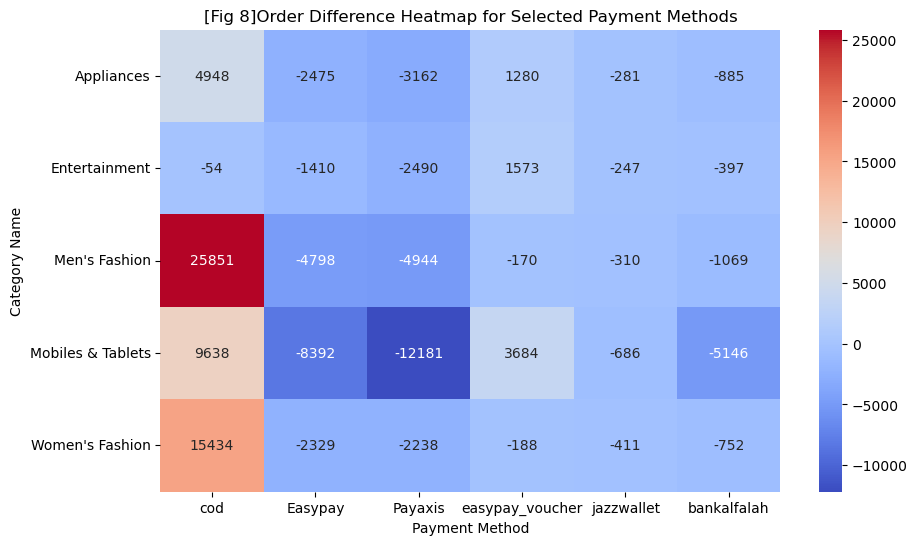

In [179]:
# set the pivot table as the data for the heatmap
heatmap_data = pivot_df[['cod','Easypay','Payaxis','easypay_voucher','jazzwallet','bankalfalah']]

# create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.0f')

# set labels and title
plt.xlabel('Payment Method')
plt.ylabel('Category Name')
plt.title('[Fig 8]Order Difference Heatmap for Selected Payment Methods')

# Show the heatmap
plt.show()


As we can see from heatmap above, we can conclude that `cod` is the most preferred payment method with high success rate shown by highest positive values of order difference between success and fail orders. Other possible alternatives are `easypay_voucher` and `jazzwallet`.<br><br> 
It is advised to not use `Easypay` and `Payaxis` as payment method especially for `Mobiles & Tablets` because of high total order failure rate.

# Conclusion and Recommendation

**Conclusion**<br><br>
Based on the analysis, we draw the following conclusions:

- Out of 584,496 order records, 54% are successful (completed, received), while the remaining 46% are unsuccessful (canceled, refunded).
- Order status is affected by both category and payment method, with payment method having a stronger influence.
- The top 5 categories by total successful orders are Men's Fashion, Women's Fashion, Mobiles & Tablets, Superstore, and Beauty & Grooming.
- The top 5 categories by total successful revenue are Mobiles & Tablets, Appliances, Entertainment, Women's Fashion, and Others.
- The top 5 most preferred payment methods by total orders are COD, Payaxis, Easypay, Easypay_voucher, and Jazzwallet.

**Recommendation**<br><br>

Based on these conclusions, we recommend the following strategies for emerging start-ups in Pakistan:

- Focus on the top 5 categories (based on total orders and total revenue):
    - Mobiles & Tablets (highest total order, highest total revenue)
    - Men's Fashion (2nd highest total order, 6th highest total revenue)
    - Women's Fashion (3rd highest total order, 7th highest total revenue)
    - Appliances (4th highest total order, 2nd highest total revenue)
    - Entertainment (10th highest total order, 3rd highest total revenue)
- Payment:
    - Use COD as the primary payment method to increase the order success rate. Alternatives are Easypay_voucher and Jazzwallet.
    - Avoid using Easypay and Payaxis for electronics categories such as Mobiles & Tablets, Entertainment, and Appliances.